In [18]:
# Install packages
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv("emissions analysis .csv")

In [20]:
df.head()

,year,state-name,sector-name,fuel-name,value
0,1970,Alabama,Industrial carbon dioxide emissions,Coal,26.721507
1,1970,Alabama,Industrial carbon dioxide emissions,Petroleum,3.577779
2,1970,Alabama,Industrial carbon dioxide emissions,Natural Gas,8.944097
3,1970,Alabama,Industrial carbon dioxide emissions,All Fuels,39.243383
4,1970,Alabama,Total carbon dioxide emissions from all sectors,All Fuels,102.646851


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59901 entries, 0 to 59900
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         59901 non-null  int64  
 1   state-name   59901 non-null  object 
 2   sector-name  59901 non-null  object 
 3   fuel-name    59901 non-null  object 
 4   value        59901 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


In [22]:
df.shape

(59901, 5)

In [23]:
df.isnull().sum()

,0
year,0
state-name,0
sector-name,0
fuel-name,0
value,0


In [ ]:
df_clean = df.dropna(subset=["state-name", "year", "sector-name", "fuel-name", "value"])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

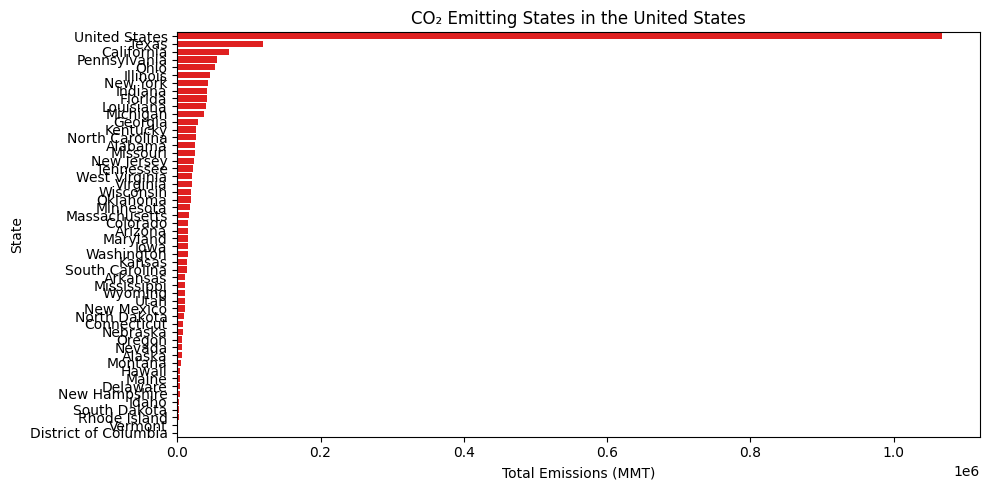

In [ ]:
states = df.groupby("state-name")["value"].sum().sort_values(ascending=False)

# Plotting the CO₂ emitting states
plt.figure(figsize=(10, 5))
sns.barplot(x=states.values, y=states.index, color="red")
plt.title("CO₂ Emitting States in the United States")
plt.xlabel("Total Emissions (MMT)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

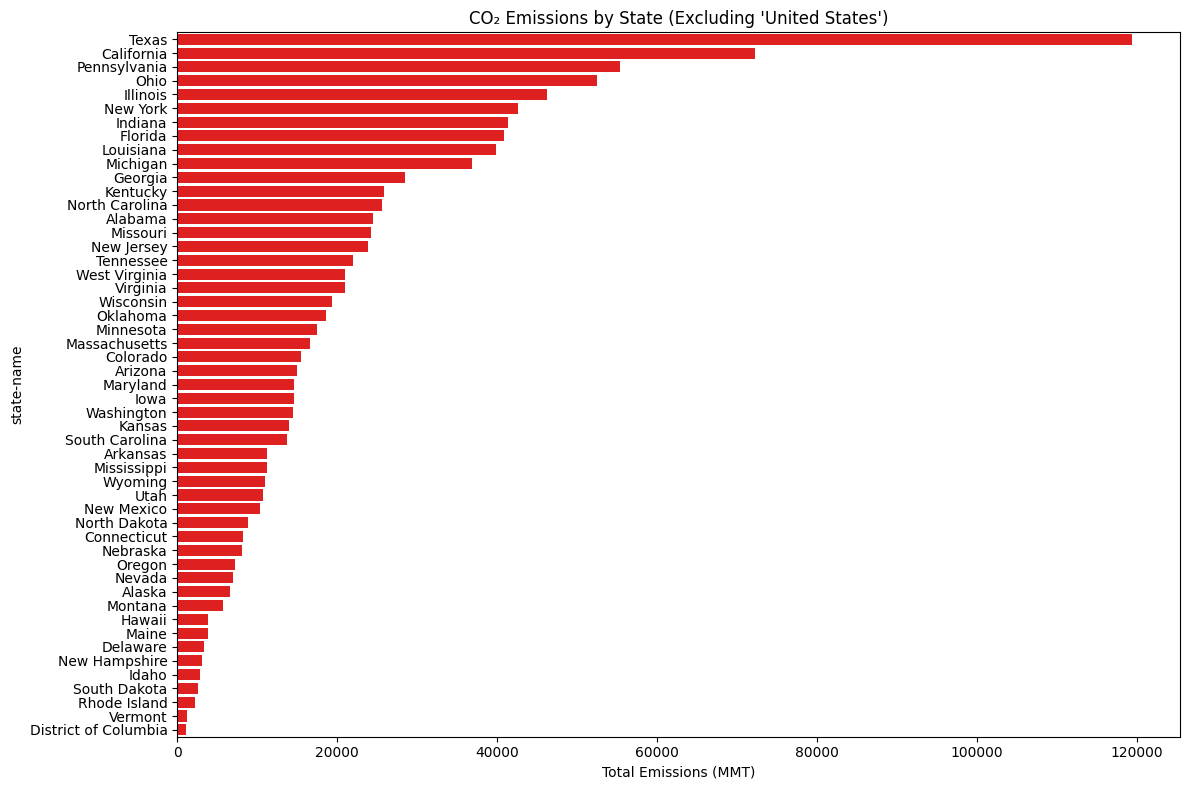

In [ ]:
df = df[df["state-name"] != "United States"]


# Group and plot the updated data after dropping 'United States' from the column state-name
states_after = df.groupby("state-name")["value"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=states_after.values, y=states_after.index, color="red")
plt.title("CO₂ Emissions by State (Excluding 'United States')")
plt.xlabel("Total Emissions (MMT)")
plt.ylabel("state-name")
plt.tight_layout()
plt.show()

In [ ]:
#drop rows with missing values
df_clean = df_clean.dropna(subset=["year", "state-name", "sector-name", "fuel-name", "value"])

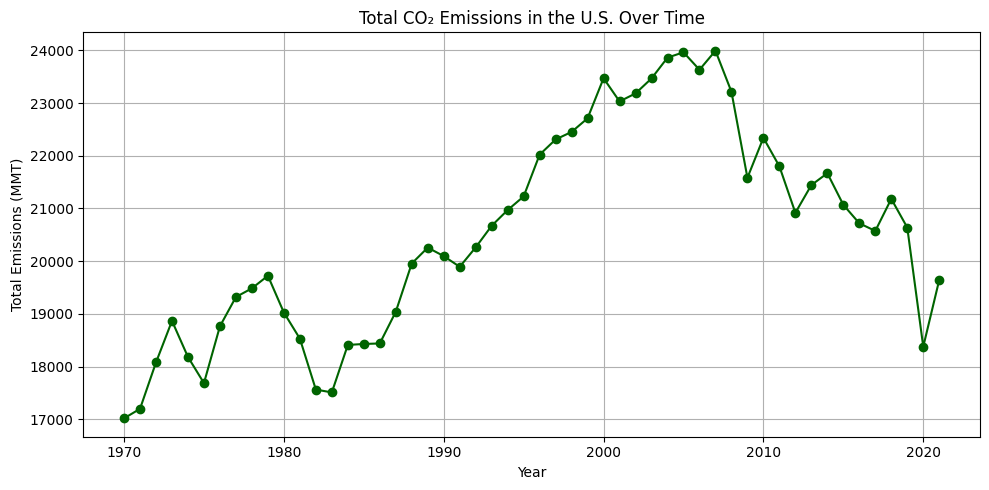

In [24]:
#Total CO₂ Emissions Over Time
emissions_by_year = df_clean.groupby("year")["value"].sum()

plt.figure(figsize=(10, 5))
plt.plot(emissions_by_year.index, emissions_by_year.values, marker='o', color='darkgreen')
plt.title("Total CO₂ Emissions in the U.S. Over Time")
plt.xlabel("Year")
plt.ylabel("Total Emissions (MMT)")
plt.grid(True)
plt.tight_layout()
plt.show()

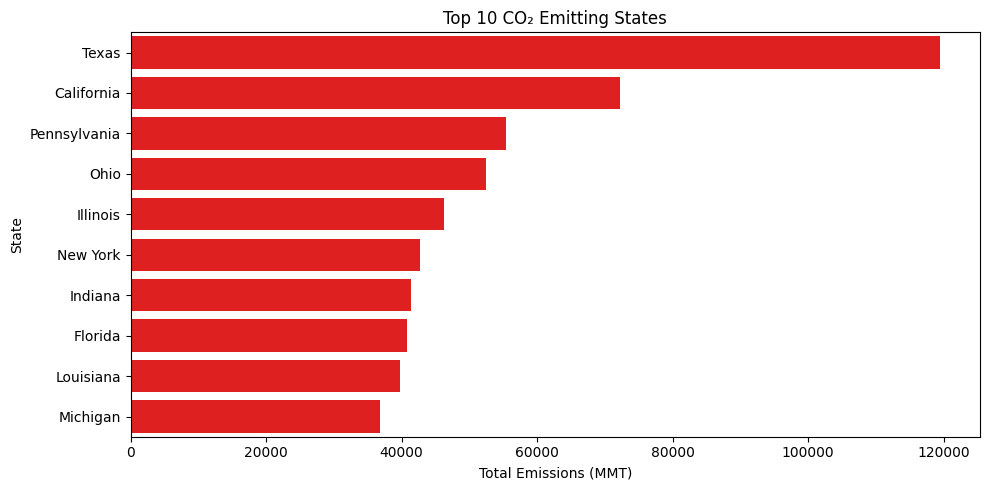

In [ ]:
#plot top 10 CO2 emission state
top_states = df_clean.groupby("state-name")["value"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.values, y=top_states.index, color="red")
plt.title("Top 10 CO₂ Emitting States")
plt.xlabel("Total Emissions (MMT)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

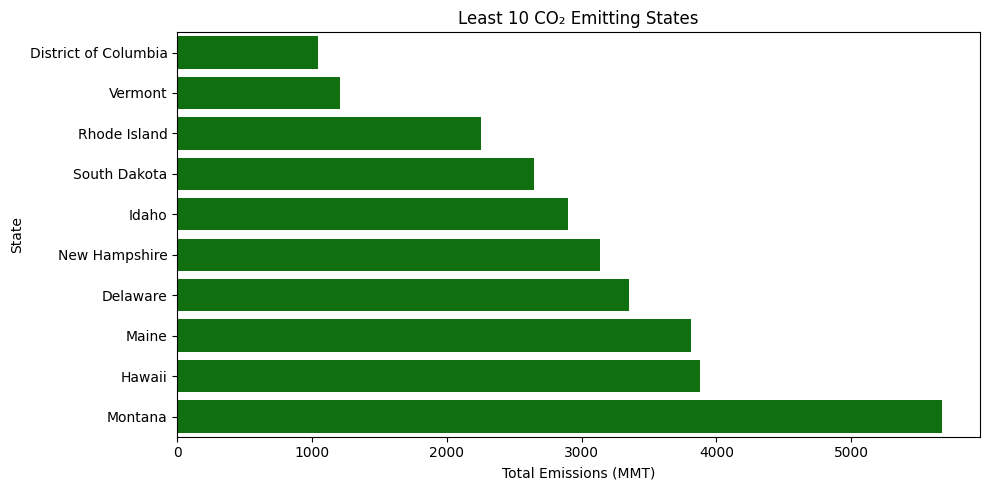

In [ ]:
#plot bottom 10 CO2 emission state

bottom_states = df_clean.groupby("state-name")["value"].sum().sort_values().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=bottom_states.values, y=bottom_states.index, color="green")
plt.title("Least 10 CO₂ Emitting States")
plt.xlabel("Total Emissions (MMT)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

In [ ]:
# Filter out 'All Sectors'
df_sector_filtered = df_clean[df_clean["sector-name"] != "Total carbon dioxide emissions from all sectors"]


# readable names for each sector
sector_map = {
    "Electric Power carbon dioxide emissions": "Electric Power",
    "Transportation carbon dioxide emissions": "Transportation",
    "Industrial carbon dioxide emissions": "Industrial",
    "Residential carbon dioxide emissions": "Residential",
    "Commercial carbon dioxide emissions": "Commercial"
}

In [25]:
# Group and rename
sector_emissions = df_sector_filtered.groupby("sector-name")["value"].sum()
sector_emissions = sector_emissions.rename(index=sector_map).sort_values(ascending=False)

<ipython-input-26-924ca65ce68b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_emissions.values, y=sector_emissions.index, palette="Blues_d")


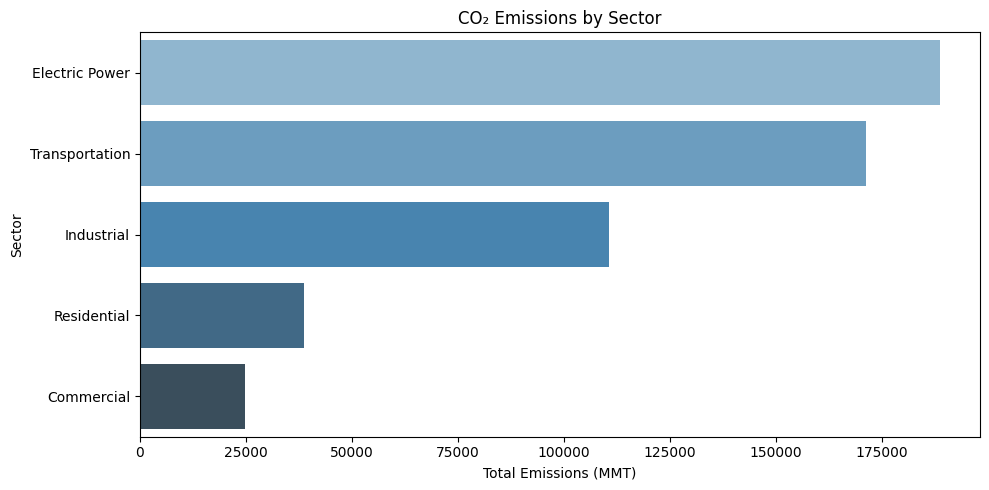

In [26]:
#Plot emission by sector
plt.figure(figsize=(10, 5))
sns.barplot(x=sector_emissions.values, y=sector_emissions.index, palette="Blues_d")
plt.title("CO₂ Emissions by Sector")
plt.xlabel("Total Emissions (MMT)")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

In [27]:
# plot for CO₂ Emissions by Fuel Type focus on "Texas"
texas_data = df_clean[df_clean["state-name"] == "Texas"]
texas_data = texas_data[texas_data["fuel-name"] != "All Fuels"]
fuel_emissions = texas_data.groupby("fuel-name")["value"].sum().sort_values(ascending=False)

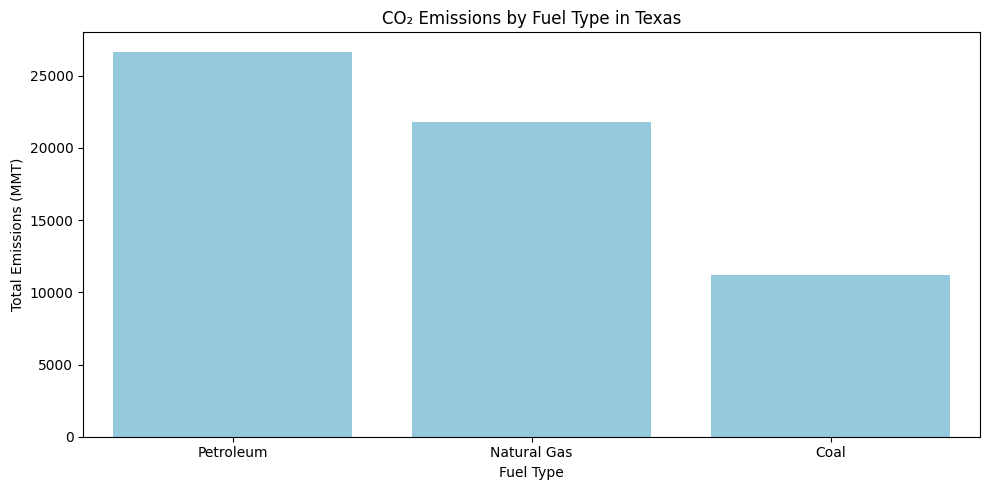

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(x=fuel_emissions.index, y=fuel_emissions.values, color="skyblue")
plt.title("CO₂ Emissions by Fuel Type in Texas")
plt.xlabel("Fuel Type")
plt.ylabel("Total Emissions (MMT)")
plt.tight_layout()
plt.show()

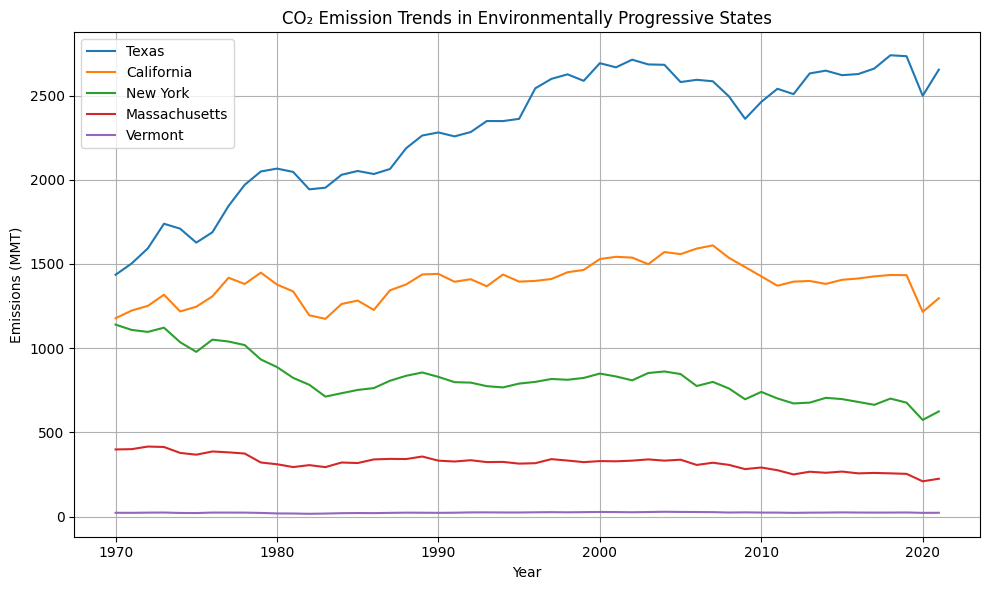

In [29]:
selected_states = ["Texas", "California", "New York", "Massachusetts", "Vermont"]
df_selected = df_clean[df_clean["state-name"].isin(selected_states)]

plt.figure(figsize=(10, 6))
for state in selected_states:
    yearly_data = df_selected[df_selected["state-name"] == state].groupby("year")["value"].sum()
    plt.plot(yearly_data.index, yearly_data.values, label=state)

plt.title("CO₂ Emission Trends in Environmentally Progressive States")
plt.xlabel("Year")
plt.ylabel("Emissions (MMT)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

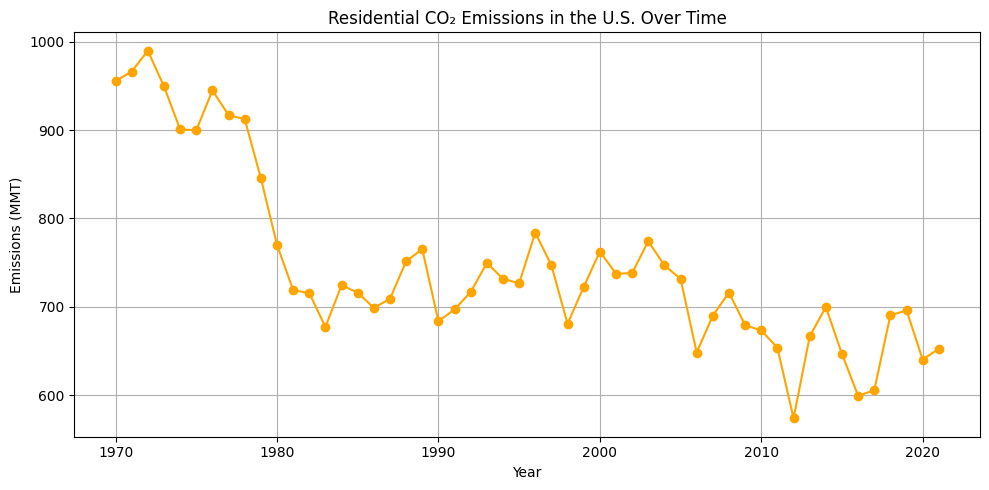

In [41]:
# Filter the dataset for only Residential CO₂ emissions
df_residential = df_clean[df_clean["sector-name"] == "Residential carbon dioxide emissions"]
res_by_year = df_residential.groupby("year")["value"].sum()

plt.figure(figsize=(10, 5))
plt.plot(res_by_year.index, res_by_year.values, marker='o', color='orange')
plt.title("Residential CO₂ Emissions in the U.S. Over Time")
plt.xlabel("Year")
plt.ylabel("Emissions (MMT)")
plt.grid(True)
plt.tight_layout()
plt.show()

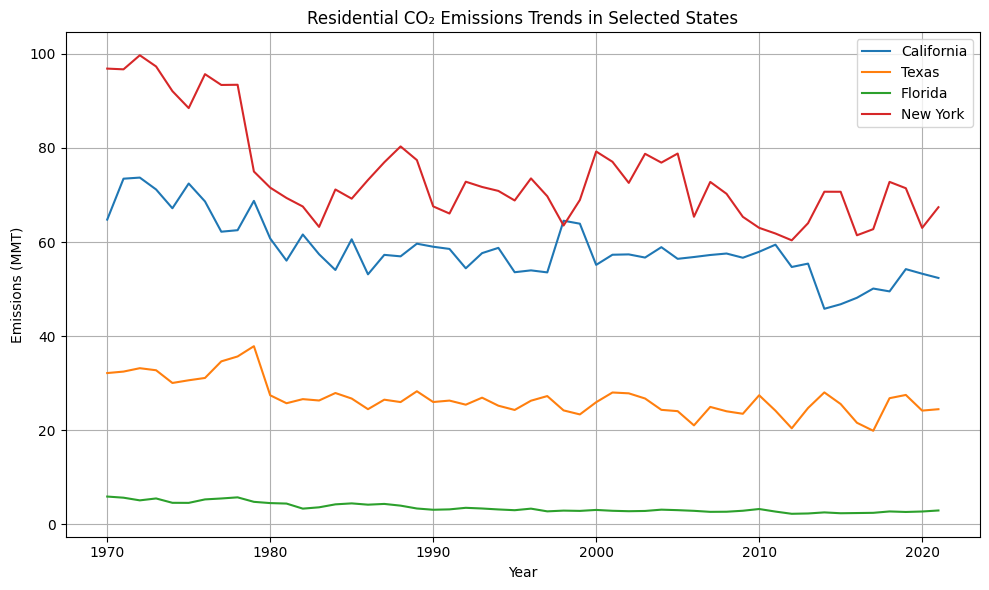

In [31]:
# Choose some states to compare trends
selected_states = ["California", "Texas", "Florida", "New York"]
df_selected_res = df_residential[df_residential["state-name"].isin(selected_states)]

plt.figure(figsize=(10, 6))
for state in selected_states:
    state_data = df_selected_res[df_selected_res["state-name"] == state].groupby("year")["value"].sum()
    plt.plot(state_data.index, state_data.values, label=state)

plt.title("Residential CO₂ Emissions Trends in Selected States")
plt.xlabel("Year")
plt.ylabel("Emissions (MMT)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

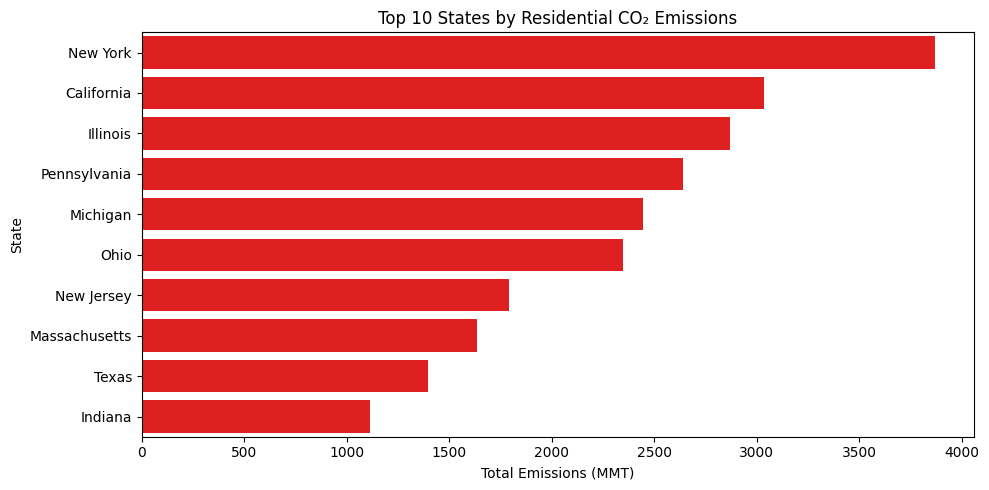

In [36]:
# Top 10 states
top_res_states = df_residential.groupby("state-name")["value"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_res_states.values, y=top_res_states.index, color="Red")
plt.title("Top 10 States by Residential CO₂ Emissions")
plt.xlabel("Total Emissions (MMT)")
plt.ylabel("State")
plt.tight_layout()
plt.show()




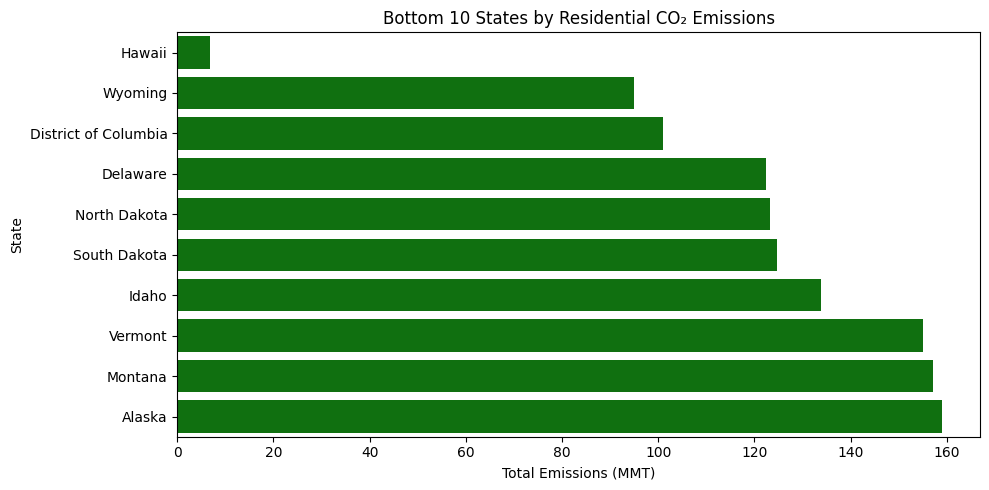

In [37]:
# Bottom 10 states
bottom_res_states = df_residential.groupby("state-name")["value"].sum().sort_values().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=bottom_res_states.values, y=bottom_res_states.index, color="Green")
plt.title("Bottom 10 States by Residential CO₂ Emissions")
plt.xlabel("Total Emissions (MMT)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

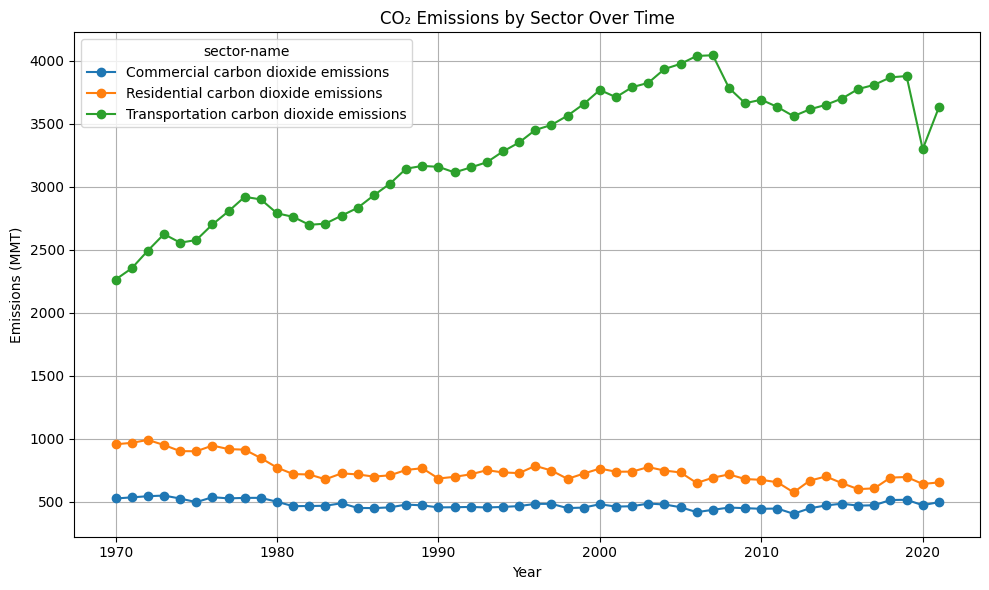

In [38]:
# Filter for selected sectors
selected_sectors = ["Residential carbon dioxide emissions", "Commercial carbon dioxide emissions", "Transportation carbon dioxide emissions"]
df_sector_compare = df_clean[df_clean["sector-name"].isin(selected_sectors)]

sector_yearly = df_sector_compare.groupby(["year", "sector-name"])["value"].sum().unstack()

sector_yearly.plot(figsize=(10, 6), marker='o')
plt.title("CO₂ Emissions by Sector Over Time")
plt.xlabel("Year")
plt.ylabel("Emissions (MMT)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# Install Plotly
!pip install plotly

import pandas as pd
import plotly.express as px

# Filter for "All Fuels" and valid states
df = df[(df["fuel-name"] == "All Fuels") & (df["state-name"] != "United States")]

state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Add abbreviation column
df["Code"] = df["state-name"].map(state_abbrev)
df = df.dropna(subset=["Code"])

fig = px.choropleth(
    df,
    locations="Code",
    locationmode="USA-states",
    color="value",
    animation_frame="year",
    color_continuous_scale="Reds",
    scope="usa",
    labels={"value": "CO₂ (MMT)"},
    title="CO₂ Emissions by U.S. State Over Time"
)

fig.update_layout(title_x=0.5)
fig.show()


<ipython-input-32-4c42e20b54b4>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Code"] = df["state-name"].map(state_abbrev)
